In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Linear Regression


In [38]:
from sklearn.linear_model import LinearRegression

### The Dataset:
The dataset we will be using for the regression task is called Boston House Prices Dataset. The dataset contains 506 observations and 13 dimensions, lets take a look:

In [39]:
boston = pd.read_csv('boston_housing.csv')
print(boston.shape)

(506, 14)


Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970.

1) CRIM - per capita crime rate by town
2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3) INDUS: proportion of non-retail business acres per town
4) CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5) NOX: nitric oxides concentration (parts per 10 million)
6) RM: average number of rooms per dwelling
7) AGE: proportion of owner-occupied units built prior to 1940
8) DIS: weighted distances to ﬁve Boston employment centers
9) RAD: index of accessibility to radial highways
10) TAX: full-value property-tax rate per 10,000 doller
11) PTRATIO: pupil-teacher ratio by town
12) B: (1000(Bk−0.63)2) where Bk is the proportion of blacks by town
13) LSTAT: % lower status of the population
14) MEDV: Median value of owner-occupied homes in 1000 doller

Our aim is to create a machine learning model to predict MEDV from the given data.

<span style="font-size:2em;"> seriously?!</span>

* B        1000(Bk - 0.63)^2 where Bk is the **proportion of blacks by town**
* LSTAT    % **lower status** of the population        

well.... yes it's from the 70s

you can read more about it in this blogpost digging deeper into the dataset and this column specifically:<br>
https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8

In [40]:
feature_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X = boston[feature_cols]
y = boston['MEDV']

After we have seen the data and we have the some observations, we can train the data on using a linear regressor:

In [41]:
reg  = LinearRegression() #The best thing about linear regression, that we don't have ANY hyperparameter to tune :-)
reg.fit(X, y)

LinearRegression()

#### The way we predict the y for a new data is by using the following:

For each row in the new data the regressor will predict the outcome based on the way he was trained to.

In [42]:
preds = reg.predict(X)
print(preds.shape)
reg.predict(X)[:3]

(506,)


array([30.00384338, 25.02556238, 30.56759672])

As you recall, the algorithm of a linear model is just a matrix with the coefficients of each parameter:

$ y = w_0+ w_1 x_1 + w_2 x_2 + ... $ <br>
So that $w_0$ is the intercept and the $w_1$... $w_m$ are coefs.<br><br>

$b$ is a scalar <br>
$W$ is a vector of coefs with a shape of (n_features) <br>
$x$ is a matrix of inputs with a shape of (n_samples, n_features) <br>
$y$ is a vecotr of outputs with a shape of (n_samples)

<!-- In the general matter, we can create a larger coef matrix for multiple regression purposes:

$$ y = xW^T + b $$ 
So that: <br>
$b$ is a vector of intercepts with a shape of (n_regression_tasks, 1) <br>
$W$ is a matrix of coefs with a shape of (n_regression_tasks, n_features) <br>
$x$ is a matrix of inputs with a shape of (n_samples, n_features) <br>
$y$ is a matrix of outputs with a shape of (n_samples, n_regression_tasks) -->

We can take a look over these coefs in our regressor attributes:

In [43]:
W = reg.coef_
b = reg.intercept_ #Since we have only one prediction task, the shape of the W and b will be (13, ) and () = 1
print(f'W coefs: \n{W}')
print(f'W intercept: {b}','\n')
print(f'W len: {len(W)}')
print(f'b len: {b.shape}')
print(f'X len: {X.shape}')



W coefs: 
[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
W intercept: 36.45948838508985 

W len: 13
b len: ()
X len: (506, 13)


In [44]:
# np.dot(X,W.transpose())+b Equivilant to reg.predict(X)

print((np.dot(X,W.transpose())+b)[:3])
print(reg.predict(X)[:3])

[30.00384338 25.02556238 30.56759672]
[30.00384338 25.02556238 30.56759672]


If we want to take a look on the coefs:

In [45]:
#Zipped them together with the relevant feature name
coef_df = pd.DataFrame(W.reshape(-1, 1), columns = ["Coefficients"], index=feature_cols)
# add some styling to the dataframe
coef_df.style.background_gradient(cmap='coolwarm')

,Coefficients
CRIM,-0.108011
ZN,0.046420
INDUS,0.020559
CHAS,2.686734
NOX,-17.766611
RM,3.809865
AGE,0.000692
DIS,-1.475567
RAD,0.306049
TAX,-0.012335


### Linear vs Non Linear Transformations

In [46]:
feature_name = 'RM'
feature_index = X.columns.get_loc(feature_name)
# Linear transformations for one feature
X_lin_mul = X.copy()
X_lin_mul[feature_name] = X_lin_mul[feature_name] * 10

X_lin_add = X.copy()
X_lin_add[feature_name] = X_lin_add[feature_name] +17

#Non linear transformation for one feature
X_not_lin = X.copy()
X_not_lin[feature_name] = X_not_lin[feature_name] ** 2 #Power of 2

In [47]:
reg = LinearRegression()

reg.fit(X_lin_mul, y)
W_lin_mul = reg.coef_

reg.fit(X_lin_add, y)
W_lin_add = reg.coef_
inter_lin_add = reg.intercept_

reg.fit(X_not_lin, y)
W_not_lin = reg.coef_


pd.DataFrame([[W[feature_index],W_lin_add[feature_index],W_lin_mul[feature_index],W_not_lin[feature_index]]],
            columns = ['original',
                        'linear transforamtion (x+17)',
                        'linear transforamtion (x*10)',
                        'not linear transforamtion (x^2)'])

,original,linear transforamtion (x+17),linear transforamtion (x*10),not linear transforamtion (x^2)
0,3.809865,3.809865,0.380987,0.340329


In [48]:
print (f'original intercept: {b}')
print(f'intecept after linear transformation (x+17): {inter_lin_add}')
print(f'{round(b,2)} - ({round(W_lin_add[feature_index],2)} * 17) = {round(b-W_lin_add[feature_index]*17,2)}')

original intercept: 36.45948838508985
intecept after linear transformation (x+17): -28.308220130666417
36.46 - (3.81 * 17) = -28.31


And of course to evaluate our model and look for an R^2 score:

In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [50]:
#MSE cost function 
print (mean_squared_error(y, reg.predict(X)))

#MAE cost function It means that in average we miss predicted the price by 3272$.
print (mean_absolute_error(y, reg.predict(X)))

#R^2 
print (reg.score(X, y))
print (r2_score(y, reg.predict(X))) #Equivalent to the above line.

160.44934774557194
11.470670632196663
-0.9006182341063349
-0.9006182341063349


And a great evaluation huristic:

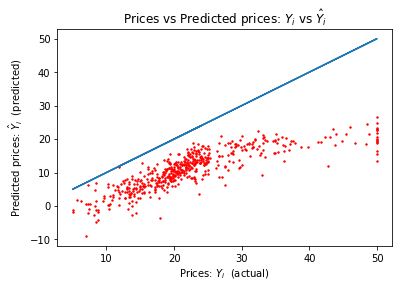

In [51]:
plt.scatter(y, reg.predict(X), s=2, c = "red")
plt.plot(y,y)
plt.xlabel("Prices: $Y_i$  (actual)")
plt.ylabel("Predicted prices: $\hat{Y}_i$  (predicted)")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

plt.show()